# Machine Learning Classifier - Poisonous Mushrooms

- **Author**: Aaron Gillespie  
- **Date**: 2025-04-01
- **Objective**: 
  - build a classifier using machine learning
  - present the classifier & demonstrate understanding of underlying concepts
  - document the process
  - submit as NW Missouri University CSIS 44-670 midterm

We have a dataset about mushrooms, some of which are safe, others not. Our goal is to use machine learning to build a **classifier** capable of predicting whether or not mushrooms are poisonous.

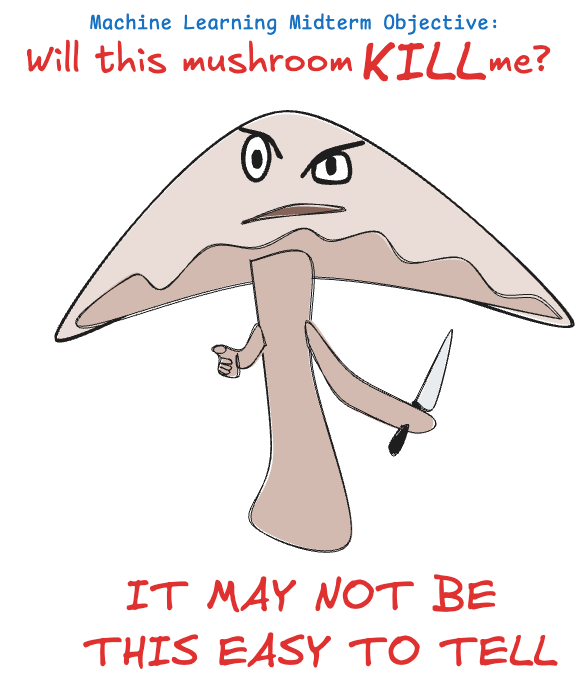

> [!warning] Disclaimer:
> This work should not be used in determining whether or not you should eat a mushroom you find. Just don't.

## Section 1: Import & Inspect the Data

The first thing to do in any exploratory data analysis project - import the data & start to familiarize yourself with it.